# Jupyter Notebook
# Lec 28 - SVCs

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/300px-SVM_margin.png)

In [1]:
# Everyone's favorite standard imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import time
import seaborn as sns


# ML imports we've used previously
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



In this module we are going to test out the SVC methods discussed in class. The book's definitions as we talked about in class are:

- *Maximal Margin Classifiers*, where the goal was to find a separating hyperplane with no misclassifications, 
- *Support vector classifiers*, where we allow for a soft margin and hence some data points can end up either on the wrong side of the margin or the wrong side of the hyperplane. 

The `sklearn` function to do this is `SVC`.  This can do either version above as long as we pass the correct inputs to do all of this, and we can basically trick it (by understanding the innards) into doing any of them.  **<font color=red>However, there are two things that will likely be confusing. </font>**
- The command is just called `SVC`, but you should thinking of it as doing the most general SVM as defined in the book (we'll cover this next class) and then we can modify our inputs to allow for the other options as necessary.
- The cost input parameter is **not** the same as the `C` defined in the book but it controls the same thing. 

The code below is to make plotting easier later.  Once you have your $\beta_0$, $\beta_1$, $\beta_2$ you should be able to easily draw the line. 

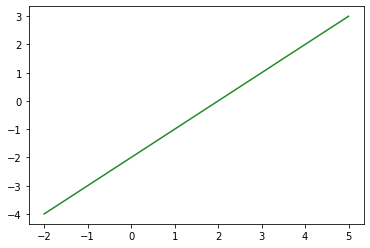

In [35]:
def plotLine(b0,b1,b2,xmin = -2, xmax = 5):
    """
    Pass in your coefficients to draw the line 
    b0 + b1 * X_1 + b2 * X_2 = 0
    """
    a = -b1 / b2
    xx = np.linspace(xmin,xmax)
    yy = a * xx - b0 / b2

    plt.plot(xx,yy, color = "forestgreen")
    

plotLine(b0 = 2, b1 = -1, b2 = 1)
plt.show()

For now, we're going to mess with some synthetic data (meaning I generated it and saved it as a CSV for you). 

In [3]:
data_df = pd.read_csv('DataSets/SVM-Data.csv', 
                delimiter=' ', 
                header = None, 
                )

data_df.columns = ['X1','X2', 'y']
data_df.head(10)

,X1,X2,y
0,0.996440,0.712421,1.0
1,1.422487,3.152205,-1.0
2,0.059144,-0.363311,1.0
3,0.100738,0.355438,1.0
4,1.406597,2.788238,-1.0
5,-0.336336,-0.100614,1.0
6,-0.052308,0.249218,1.0
7,2.568133,2.012758,-1.0
8,1.564296,2.972179,-1.0
9,0.187603,-0.329870,1.0


Here's a few helpful subsets of the data we can use for later drawing depending on what we want to do with it. 

In [4]:
# Just the X and y as numpy arrays
X = data_df[['X1','X2']].values 
y = data_df['y'].values

# Just the data points where the y value is 1
X_pos = X[y>0]

# Just the data points where the y value is -1
X_neg = X[y<0]


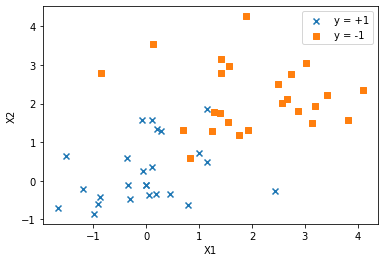

In [5]:
# Plotting so that we can see which points have y=+1 and which have y = -1
plt.scatter(X_pos[:,0], X_pos[:,1], label = 'y = +1', marker = 'x')
plt.scatter(X_neg[:,0], X_neg[:,1], label = 'y = -1', marker = 's')
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

And then, tada! Here's all it takes to fit your support vector classifier. 

In [6]:
from sklearn.svm import SVC

In [7]:
svc = SVC(C=1, kernel='linear', )
svc.fit(X,y)

SVC(C=1, kernel='linear')

&#9989; **<font color=red>Do this:</font>** Use your trained model to figure out the equation of the hyperplane (hint: go looking for the `coef_` and `intercept_`). Plot it on a graph with the data points (see above for the `plotLine` function!).  Does the resulting hyperplane seem reasonable? 

[3.28886209]
[[-1.19737787 -1.53773829]]


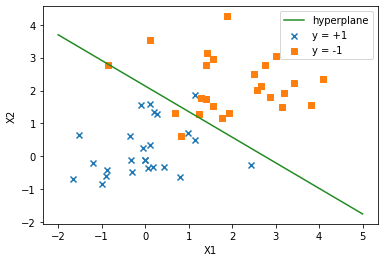

In [29]:
# Your code here 
print(svc.intercept_)
print(svc.coef_)
x1_show = np.linspace(-2,5,10)
x2_show = -svc.intercept_/svc.coef_[0][1] - x1_show*svc.coef_[0][0]/svc.coef_[0][1]

plt.scatter(X_pos[:,0], X_pos[:,1], label = 'y = +1', marker = 'x')
plt.scatter(X_neg[:,0], X_neg[:,1], label = 'y = -1', marker = 's')
plt.plot(x1_show,x2_show, label = "hyperplane", color ="forestgreen")
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

Remember that the SVC setting only uses a subset of observations, called *support vectors* to actually determine this hyperplane. The `svc` object keeps track of those for us. 

In [17]:
# Here are the indices of the support vectors from our original X matrix

svc.support_

array([18, 22, 32, 33, 39, 42, 44,  0, 21, 27, 30, 31, 40, 47])

In [18]:
# It also keeps track of the points themselves 
sv = svc.support_vectors_
print(sv)

[[-0.85968797  2.7893664 ]
 [ 1.28953355  1.7848122 ]
 [ 1.23923969  1.28883677]
 [ 0.83529809  0.60292598]
 [ 1.55457001  1.51787981]
 [ 0.68922687  1.31043477]
 [ 1.75928886  1.17587655]
 [ 0.99643983  0.71242127]
 [ 2.43077119 -0.25209213]
 [ 0.19766009  1.33484857]
 [ 0.26961241  1.29196338]
 [ 0.10960984  1.58248112]
 [-0.08687561  1.56153229]
 [ 1.15139101  1.85733101]]


&#9989; **<font color=red>Do this:</font>** Draw a scatter plot of these points on top of the drawing you've already been building with some different marker.  Do these points make sense to be the support vectors?



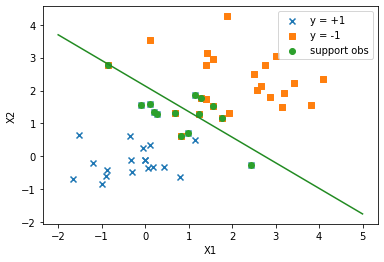

In [36]:
plt.scatter(X_pos[:,0], X_pos[:,1], label = 'y = +1', marker = 'x')
plt.scatter(X_neg[:,0], X_neg[:,1], label = 'y = -1', marker = 's')
plt.xlabel('X1')
plt.ylabel('X2')

plotLine(svc.intercept_, svc.coef_[0][0], svc.coef_[0][1])


# Your code here to also plot the support vectors, stored above as `sv`
plt.scatter(sv[:,0], sv[:,1], label = 'support obs', marker = 'o')

plt.legend()
plt.show()

Now that you have a sense of what's going on in the svc function, I've built you a function that will make this nice drawing for us without much effort.  We can hand it our `X` and `y` data, along with the trained `svc` to get the plot, with some added stuff, including dashed lines for the margin and colors for which side of the hyperplane you're on (blue for -1, red for +1).

In [37]:
# Run this cell to define the function
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xvec = np.arange(x_min, x_max, h)
    yvec = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xvec,yvec )
    
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by X's
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths=1)
    
    if svc.kernel == 'linear':
        # Get the margin lines 
        w = svc.coef_[0]
        a = -w[0] / w[1]
        yhyperplane = a * xvec - (svc.intercept_[0]) / w[1]
        margin = 1 / np.sqrt(np.sum(svc.coef_ ** 2))
        ymargin_down = yhyperplane+  - np.sqrt(1 + a ** 2) * margin
        ymargin_up = yhyperplane + np.sqrt(1 + a ** 2) * margin
        plt.plot(xvec,ymargin_down, "k--")
        plt.plot(xvec,ymargin_up, "k--")

    
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    # plt.show()
    print('Number of support vectors: ', svc.support_.size)



Number of support vectors:  14


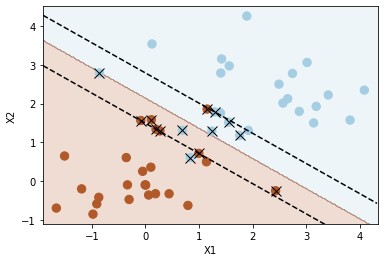

In [38]:
#From here on, you can just use this command to plot.
# I'm passing in the trained SVC classifier, plus the X and y data used
plot_svc(svc, X, y)

plt.show()


## Messing with $C$


As in class, the `C` parameter controls how severe the margin violations can be. However, there is a warning: 

**WARNING**: 
The $C$ in the class/textbook and the $C$ used as input to the `SVC` command are **NOT THE SAME**.
- The cost $C$ in class had the property that big $C$ meant big margin 
- This is a DIFFERENT $C$. In this case, big $C$ means small margin. 

They're both serving the same purpose, i.e. to control how tolerant we are to misclassifications. 

Let's take a look at a few examples in here.

Number of support vectors:  21


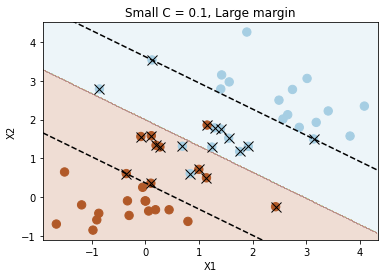

In [39]:
svc = SVC(C=10e-2, kernel='linear', )
svc.fit(X, y)
plot_svc(svc, X, y)

plt.title(f"Small C = {10e-2}, Large margin")
plt.show()

Number of support vectors:  14


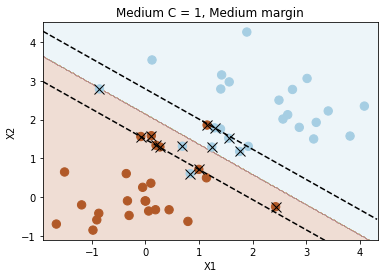

In [40]:
svc = SVC(C=1, kernel='linear', )
svc.fit(X, y)
plot_svc(svc, X, y)

plt.title(f"Medium C = 1, Medium margin")
plt.show()

Number of support vectors:  9


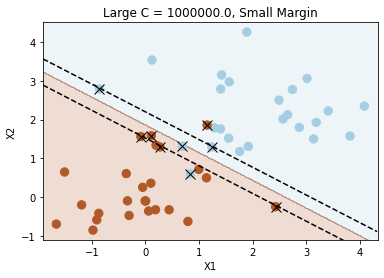

In [41]:
svc = SVC(C=10e5, kernel='linear', )
svc.fit(X, y)
plot_svc(svc, X, y)

plt.title(f"Large C = {10e5}, Small Margin")
plt.show()


As with previous examples in this class, we can use K-Fold CV to tune this parameter. 

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
# Select the optimal C parameter by cross-validation
C_list = [0.001, 0.01, 0.1, 1, 5, 10, 100]
tuned_parameters = [{'C': C_list}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             scoring='accuracy')

&#9989; **<font color=red>Do this:</font>** Use the `clf.cv_results_` function to determine which $C$ give the best score (note there could be ties). Which $C$ did the function choose? 

In [44]:
# Your code here
clf.cv_results_

{'mean_fit_time': array([0.0043797 , 0.00468681, 0.00313494, 0.00156379, 0.00151093,
        0.00423393, 0.00157592]),
 'std_fit_time': array([0.00622734, 0.00715923, 0.00626991, 0.00469136, 0.00453279,
        0.00657714, 0.00472777]),
 'mean_score_time': array([0.        , 0.00252247, 0.        , 0.        , 0.0016665 ,
        0.00362656, 0.00156245]),
 'std_score_time': array([0.        , 0.00522323, 0.        , 0.        , 0.00464507,
        0.00617787, 0.00468736]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.4, 1. , 1. , 1. , 1. , 1. , 1. ]),
 'split1_test_score': array([0.4, 1. , 1. , 1. , 1. , 1. , 1. ]),
 'split2_test_score': array([0.4, 1. , 1. , 1. , 1. , 1. , 1. ]),
 'split3_test_score': array([0

&#9989; **<font color=red>Do this:</font>** Load in the `SVM-Data2.csv` data from the folder. Run this same analysis again, namily: 
- Use the `GridSearchCV` function to determine the best choice of $C$.
- Train an individual `SVC` instance with $C$ set to that value.  Then you can draw the resulting model with the `plot_svc` function from earlier. How does the model do?



-----
### Congratulations, we're done!
Written by Dr. Liz Munch, Michigan State University

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.